<a href="https://colab.research.google.com/github/Nasjr/Machine-Learing-with-Colab/blob/main/Image_classification_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from google.colab.patches import cv2_imshow 
from random import shuffle
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score

In [2]:
from zipfile import ZipFile

dataset = '/content/drive/MyDrive/DataScience_Project/fulldata_resized (1).zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [3]:
dataset_path='/content/fulldata_resized'
file_names_full=os.listdir(dataset_path)
#print the first three file names
print(file_names_full[0:3])

['dog471.jpeg', 'butterfly813.jpeg', 'horse1509.jpeg']


In [4]:
#Reduce the size of data (deleted some images and eleminated some classes so that the size is trainable and don't consume memory) no need to run it again the data is already saved
#create folder named image_reduced
fullpath='/content/fulldata_resized/'
newpath='/content/image_reduced/'
#Set a limit for deleting images
count_dog=0
cat_count=0
buter_count=0
horse_count=0
cow_count=0
chicken_count=0


for i in range(len(file_names_full)):
  if file_names_full[i][0:3]=='dog'and count_dog<1000:
    try:
      os.remove(fullpath+file_names_full[i])
      count_dog+=1
    except OSError as e:
      # If it fails, inform the user.
      print("Error: %s - %s." % (e.filename, e.strerror))


for i in range(len(file_names_full)):
  if file_names_full[i][0:3]=='cat'and cat_count<950:
    try:
      os.remove(fullpath+file_names_full[i])
      cat_count+=1
    except OSError as e:
      # If it fails, inform the user.
      print("Error: %s - %s." % (e.filename, e.strerror))



#remove this class
for i in range(len(file_names_full)):
  if file_names_full[i][0:9]=='butterfly':
    try:
      os.remove(fullpath+file_names_full[i])
    except OSError as e:
      # If it fails, inform the user.
      print("Error: %s - %s." % (e.filename, e.strerror))


for i in range(len(file_names_full)):
  if file_names_full[i][0:5]=='horse'and horse_count<950:
    try:
      os.remove(fullpath+file_names_full[i])
      horse_count+=1
    except OSError as e:
      # If it fails, inform the user.
      print("Error: %s - %s." % (e.filename, e.strerror))


for i in range(len(file_names_full)):
  if file_names_full[i][0:3]=='cow'and cow_count<850:
    try:
      os.remove(fullpath+file_names_full[i])
      cow_count+=1
    except OSError as e:
      # If it fails, inform the user.
      print("Error: %s - %s." % (e.filename, e.strerror))

#remove this class
for i in range(len(file_names_full)):
  if file_names_full[i][0:7]=='chicken':
    try:
      os.remove(fullpath+file_names_full[i])
    except OSError as e:
      # If it fails, inform the user.
      print("Error: %s - %s." % (e.filename, e.strerror))

file_names=os.listdir(fullpath)
for i in range(len(file_names)):
    os.replace(fullpath+file_names[i], newpath+file_names[i])

# Categories

**In this Dataset we have several Categories and we are going to show them below :**



**As We see we have :**


*   Dogs : 1775 image
*   cats : 1668 image
*   butterfly : 1496 image
*   horse : 1686 image
*   cow : 1566 image
*   chicken : 1547 image

**After reducing data we have:**



*   dog: 755
*   cat: 718
*   butterfly: 0
*   horse: 736
*   cow: 716
*   chicken: 0


**Each Category Must be mapped to a number from (1 to n) where n is the number of categories :**


*   Dogs --> 0
*   cats --> 1
*   horse --> 2
*   cow --> 3








In [5]:
#We need two lists one for the filenames and one for the labels
#create folder named image_reduced
file_names_resize_reduced=os.listdir('/content/image_reduced/')
for i in range(5):
  random.seed(4)
  random.shuffle(file_names_resize_reduced)
print('shffuled list: ',file_names_resize_reduced[0:10])


labels=[]
imgnames=[]

for i in range(len(file_names_resize_reduced)):
  
  #Store the image names
  imgnames.append(file_names_resize_reduced[i])
  
  #Store the labels of the images
  if file_names_resize_reduced[i][0:3]=='dog':
        labels.append(0)
  elif file_names_resize_reduced[i][0:3]=='cat':
        labels.append(1)
  elif file_names_resize_reduced[i][0:5]=='horse':
        labels.append(2)
  elif file_names_resize_reduced[i][0:3]=='cow':
        labels.append(3)
  else:
        print('This is an error')

print(imgnames[0:7])
print(labels[0:7])

shffuled list:  ['horse976.jpeg', 'cat446.jpeg', 'horse44.jpeg', 'dog732.jpeg', 'dog374.jpeg', 'cow1561.jpeg', 'horse1013.jpeg', 'cat624.jpeg', 'cat1050.jpeg', 'cow573.jpeg']
['horse976.jpeg', 'cat446.jpeg', 'horse44.jpeg', 'dog732.jpeg', 'dog374.jpeg', 'cow1561.jpeg', 'horse1013.jpeg']
[2, 1, 2, 0, 0, 3, 2]


In [ ]:
"""#Check all the types after reducing the size of the data
D_counts={'dog':0,'cat':0,"butterfly":0,"horse":0,'cow':0,'chicken':0,"error":0}
for i in range(len(file_names_reduced)):
    if file_names_reduced[i][0:3]=='dog':
        D_counts['dog']+=1
    elif file_names_reduced[i][0:3]=='cat':
        D_counts['cat']+=1
    elif file_names_reduced[i][0:9]=='butterfly':
        D_counts['butterfly']+=1
    elif file_names_reduced[i][0:5]=='horse':
        D_counts['horse']+=1
    elif file_names_reduced[i][0:3]=='cow':
        D_counts['cow']+=1
    elif file_names_reduced[i][0:7]=='chicken':
        D_counts['chicken']+=1
    else:
        D_counts['error']+=1
print(D_counts)"""

'#Check all the types after reducing the size of the data\nD_counts={\'dog\':0,\'cat\':0,"butterfly":0,"horse":0,\'cow\':0,\'chicken\':0,"error":0}\nfor i in range(len(file_names_reduced)):\n    if file_names_reduced[i][0:3]==\'dog\':\n        D_counts[\'dog\']+=1\n    elif file_names_reduced[i][0:3]==\'cat\':\n        D_counts[\'cat\']+=1\n    elif file_names_reduced[i][0:9]==\'butterfly\':\n        D_counts[\'butterfly\']+=1\n    elif file_names_reduced[i][0:5]==\'horse\':\n        D_counts[\'horse\']+=1\n    elif file_names_reduced[i][0:3]==\'cow\':\n        D_counts[\'cow\']+=1\n    elif file_names_reduced[i][0:7]==\'chicken\':\n        D_counts[\'chicken\']+=1\n    else:\n        D_counts[\'error\']+=1\nprint(D_counts)'

In [6]:
#This was made to resize the images the images are saved on drive no need to run it again
#create folder named image_resized_reduced
resized_folder = '/content/image_resized_reduced/'
image_directory = '/content/image_reduced/'


for i in range(len(file_names_resize_reduced)):
  img_path = image_directory+file_names_resize_reduced[i]

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+file_names_resize_reduced[i]
  img.save(newImgPath)

In [7]:
#After deleting classes of animals
D_counts={'dog':0,'cat':0,"butterfly":0,"horse":0,'cow':0,'chicken':0,"error":0}
for i in range(len(file_names_resize_reduced)):
    if file_names_resize_reduced[i][0:3]=='dog':
        D_counts['dog']+=1
    elif file_names_resize_reduced[i][0:3]=='cat':
        D_counts['cat']+=1
    elif file_names_resize_reduced[i][0:9]=='butterfly':
        D_counts['butterfly']+=1
    elif file_names_resize_reduced[i][0:5]=='horse':
        D_counts['horse']+=1
    elif file_names_resize_reduced[i][0:3]=='cow':
        D_counts['cow']+=1
    elif file_names_resize_reduced[i][0:7]=='chicken':
        D_counts['chicken']+=1
    else:
        D_counts['error']+=1
print(D_counts)

{'dog': 755, 'cat': 718, 'butterfly': 0, 'horse': 736, 'cow': 716, 'chicken': 0, 'error': 0}


In [8]:
import cv2
import glob

image_directory = '/content/image_resized_reduced/'


files = []

for name in file_names_resize_reduced:
  files.append(image_directory+name)
#check for file names
print(files[0:3])


#convert all images into a MD numpy array aka 'Tensor'
all_images_array=np.asarray([cv2.imread(file) for file in files])


['/content/image_resized_reduced/horse976.jpeg', '/content/image_resized_reduced/cat446.jpeg', '/content/image_resized_reduced/horse44.jpeg']


In [9]:
print(all_images_array.shape)

(2925, 224, 224, 3)


In [10]:
#shape the data into x and y variables for training and testing

X=all_images_array
y=np.asarray(labels)


# It Is time to split our data into Training and testing Data for our model using (train_test_split) function :

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.25,stratify=y,random_state=42)

In [12]:
x_test_validate=x_test[0:232]
x_test=x_test[232:]
y_test_validate=y_test[0:232]
y_test=y_test[232:]

In [13]:
print(x_test_validate.shape)

(232, 224, 224, 3)


**Scalling the Data values so that the range is between 0-1 to avoid overfitting and avoid giving weights imbalanced importance values :**

In [14]:
#take the first train image and scale them
x_train_scaled=x_train/255

In [15]:
#take the first 3000 test image and scale them
x_test_scaled=x_test/255
x_test_scaled_validat=x_test_validate/255

In [16]:
print(x_train_scaled.shape)

(2193, 224, 224, 3)


# Model Creation : 

In [17]:
import tensorflow as tf
import tensorflow_hub as hub

In [18]:
mobile_net_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
#import mobile net model with input shape same for our photos and trainable = false not trained on the last layer
pretrained_model=hub.KerasLayer(mobile_net_model,input_shape=(224,224,3),trainable=False)

In [19]:
#specify the number of classes and the shape of the model
number_of_classes=4

model=tf.keras.Sequential([
    pretrained_model,
    #Output layer
    tf.keras.layers.Dense(number_of_classes,activation='softmax')

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [20]:
from tensorflow.python import metrics
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)


# Model Training :

In [21]:
model_trained=model.fit(x_train_scaled,y_train,epochs=5, validation_data=(x_test_scaled_validat , y_test_validate))

Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


69/69 [==============================] - 88s 1s/step - loss: 0.5328 - acc: 0.8108 - val_loss: 0.2330 - val_acc: 0.9267
Epoch 2/5
69/69 [==============================] - 66s 963ms/step - loss: 0.2257 - acc: 0.9243 - val_loss: 0.2005 - val_acc: 0.9353
Epoch 3/5
69/69 [==============================] - 63s 919ms/step - loss: 0.1726 - acc: 0.9494 - val_loss: 0.1780 - val_acc: 0.9353
Epoch 4/5
69/69 [==============================] - 64s 927ms/step - loss: 0.1392 - acc: 0.9612 - val_loss: 0.1845 - val_acc: 0.9397
Epoch 5/5
69/69 [==============================] - 64s 933ms/step - loss: 0.1233 - acc: 0.9663 - val_loss: 0.1748 - val_acc: 0.9440


# Model Evaluation

In [22]:
score,acc=model.evaluate(x_test_scaled,y_test)

print('Test score = ',score,"Accuracy Score = ",acc)

16/16 [==============================] - 13s 813ms/step - loss: 0.1941 - acc: 0.9380
Test score =  0.1940934658050537 Accuracy Score =  0.9380000233650208


In [23]:
y_hat=model.predict(x_test_scaled)

16/16 [==============================] - 15s 810ms/step


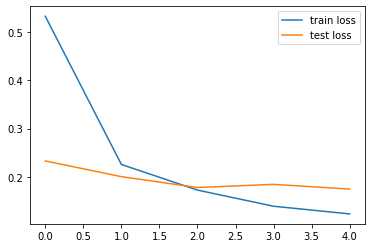

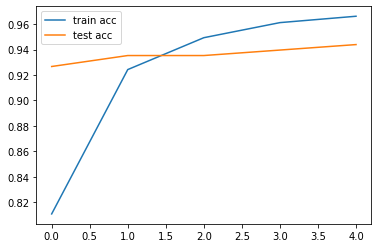

In [24]:
#plotting
plt.plot(model_trained.history['loss'] , label='train loss')
plt.plot(model_trained.history['val_loss'] , label = 'test loss')
plt.legend()
plt.show()
plt.plot(model_trained.history['acc'] , label='train acc')
plt.plot(model_trained.history['val_acc'] , label = 'test acc')
plt.legend()
plt.show()

In [27]:
print(y_hat.shape)

(500, 4)


In [28]:
Cn=confusion_matrix(y_test,np.argmax(y_hat, axis=1))
print('Confusion Matrix ')
print('-'*50)
print (pd.DataFrame(Cn, columns=['dogs','cats','horses','cows'],index=['dogs','cats','horses','cows']))

Confusion Matrix 
--------------------------------------------------
        dogs  cats  horses  cows
dogs     115     5       3     5
cats       1   117       0     0
horses     1     0     123     8
cows       1     0       7   114


Tp=687
fp=45
fn=45


percison=687/687+45 --> 0.93852
recall=0.93852
micro F1=0.9385



